# Výzva: Analýza textu o dátovej vede

> *V tomto notebooku experimentujeme s použitím rôznych URL - článok na Wikipédii o strojovom učení. Môžete si všimnúť, že na rozdiel od dátovej vedy tento článok obsahuje veľa odborných výrazov, čo robí analýzu problematickejšou. Musíme vymyslieť iný spôsob, ako vyčistiť dáta po extrakcii kľúčových slov, aby sme sa zbavili niektorých častých, ale bezvýznamných kombinácií slov.*

V tomto príklade si urobíme jednoduché cvičenie, ktoré pokrýva všetky kroky tradičného procesu dátovej vedy. Nemusíte písať žiadny kód, stačí kliknúť na bunky nižšie, aby ste ich spustili a pozorovali výsledok. Ako výzvu vás povzbudzujeme, aby ste tento kód vyskúšali s rôznymi dátami.

## Cieľ

V tejto lekcii sme diskutovali o rôznych konceptoch súvisiacich s dátovou vedou. Skúsme objaviť viac súvisiacich konceptov pomocou **ťažby textu**. Začneme s textom o dátovej vede, extrahujeme z neho kľúčové slová a potom sa pokúsime vizualizovať výsledok.

Ako text použijem stránku o dátovej vede z Wikipédie:


In [2]:
url = 'https://en.wikipedia.org/wiki/Data_science'
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Krok 1: Získanie údajov

Prvým krokom v každom procese dátovej vedy je získanie údajov. Na tento účel použijeme knižnicu `requests`:


In [3]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"77162785-16e9-4d7f-a175-7f3fcf502a66","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Machine_learning","wgTitle":"Machine learning","wgCurRevisionId":1041247229,"wgRevisionId":1041247229,"wgArticleId":233488,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 errors: missing periodical","Harv and Sfn no-target errors","CS1 maint: uses authors parameter","Articles with short description","Short description is dif

## Krok 2: Transformácia údajov

Ďalším krokom je konverzia údajov do formy vhodnej na spracovanie. V našom prípade sme stiahli zdrojový kód HTML zo stránky a potrebujeme ho previesť na čistý text.

Existuje mnoho spôsobov, ako to dosiahnuť. My použijeme najjednoduchší vstavaný objekt [HTMLParser](https://docs.python.org/3/library/html.parser.html) z Pythonu. Musíme zdediť triedu `HTMLParser` a definovať kód, ktorý bude zhromažďovať všetok text vo vnútri HTML značiek, okrem značiek `<script>` a `<style>`.


In [4]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Machine learning From Wikipedia, the free encyclopedia Jump to navigation Jump to search Study of algorithms that improve automatically through experience For the journal, see  Machine Learning (journal) . "Statistical learning" redirects here. For statistical learning in linguistics, see  statistical learning in language acquisition . Part of a series on Artificial intelligence Major goals Artificial general intelligence Planning Computer vision General game playing Knowledge reasoning Machine learning Natural language processing Robotics Approaches Symbolic Deep learning Bayesian networks Evolutionary algorithms Philosophy Ethics Existential risk Turing test Chinese room Control problem Friendly AI History Timeline Progress AI winter Technology Applications Projects Programming languages Glossary Glossary v t e Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection Data Cleaning AutoML Associ

## Krok 3: Získavanie poznatkov

Najdôležitejším krokom je premeniť naše dáta na formu, z ktorej môžeme získať poznatky. V našom prípade chceme extrahovať kľúčové slová z textu a zistiť, ktoré kľúčové slová majú väčší význam.

Použijeme Python knižnicu s názvom [RAKE](https://github.com/aneesha/RAKE) na extrakciu kľúčových slov. Najprv si túto knižnicu nainštalujeme, ak ešte nie je prítomná:


In [5]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Hlavná funkcionalita je dostupná z objektu `Rake`, ktorý môžeme prispôsobiť pomocou niektorých parametrov. V našom prípade nastavíme minimálnu dĺžku kľúčového slova na 5 znakov, minimálnu frekvenciu kľúčového slova v dokumente na 3 a maximálny počet slov v kľúčovom slove na 2. Neváhajte experimentovať s inými hodnotami a pozorovať výsledok.


In [6]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('polynomial time', 4.0),
 ('dimensionality reduction', 4.0),
 ('anomaly detection', 4.0),
 ('data set', 4.0),
 ('bayesian networks', 4.0),
 ('language corpora', 4.0),
 ('mcgraw hill', 4.0),
 ('mit press', 4.0),
 ('retrieved 2018-08-20', 4.0),
 ('artificial neuron', 3.9642857142857144),
 ('statistical learning', 3.9470198675496686),
 ('feature learning', 3.9470198675496686),
 ('reinforcement learning', 3.9470198675496686),
 ('deep learning', 3.9470198675496686),
 ('main article', 3.9411764705882355),
 ('machine learning', 3.9144111718974948),
 ('pattern recognition', 3.9),
 ('neural networks', 3.875),
 ('artificial intelligence', 3.864285714285714),
 ('supervised learning', 3.835908756438558),
 ('speech recognition', 3.833333333333333),
 ('bayesian network', 3.833333333333333),
 ('explicitly programmed', 3.8),
 ('biological brain', 3.8),
 ('unsupervised learning', 3.780353200883002),
 ('outlier detection', 3.75),
 ('ieee transactions', 3.75),
 ('isbn 978-0-262-0

Získali sme zoznam pojmov spolu s ich priradenou mierou dôležitosti. Ako môžete vidieť, najrelevantnejšie disciplíny, ako sú strojové učenie a big data, sa nachádzajú na popredných miestach v zozname.

## Krok 4: Vizualizácia výsledku

Ľudia najlepšie interpretujú údaje vo vizuálnej podobe. Preto často dáva zmysel vizualizovať údaje, aby sme získali určité poznatky. Na jednoduché zobrazenie distribúcie kľúčových slov s ich relevanciou môžeme použiť knižnicu `matplotlib` v Pythone:


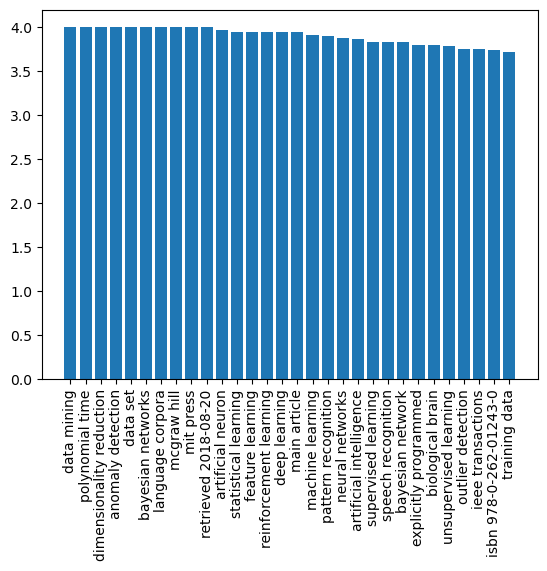

In [9]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res[:30])

Existuje však ešte lepší spôsob, ako vizualizovať frekvencie slov - pomocou **Word Cloud**. Budeme musieť nainštalovať ďalšiu knižnicu na vykreslenie word cloudu z nášho zoznamu kľúčových slov.


In [71]:
!{sys.executable} -m pip install wordcloud

Objekt `WordCloud` je zodpovedný za prijatie buď pôvodného textu, alebo vopred vypočítaného zoznamu slov s ich frekvenciami, a vráti obrázok, ktorý môže byť následne zobrazený pomocou `matplotlib`:


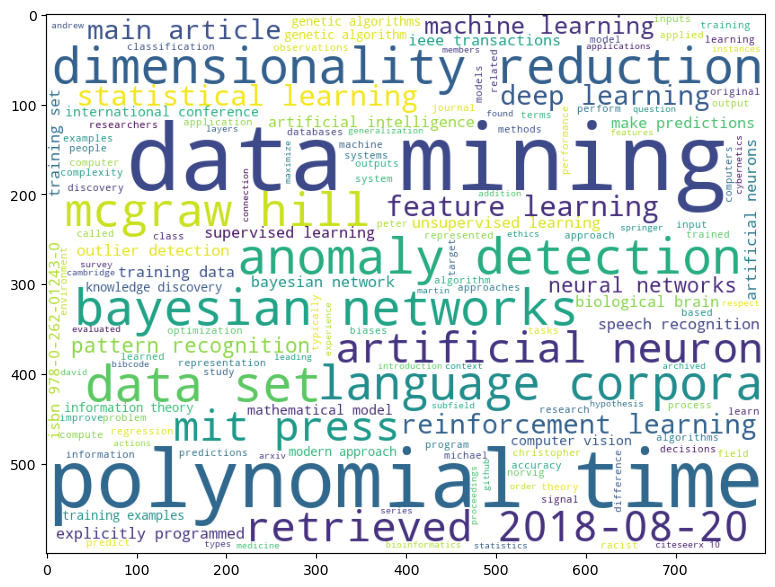

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))
plt.show()

Pôvodný text môžeme tiež zadať do `WordCloud` - pozrime sa, či dokážeme dosiahnuť podobný výsledok:


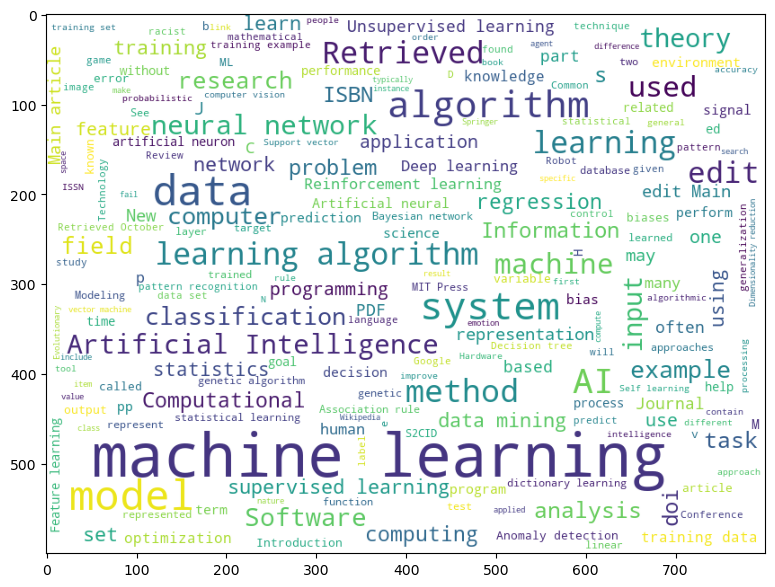

In [13]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))
plt.show()

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

Môžete vidieť, že slovný mrak teraz vyzerá pôsobivejšie, ale obsahuje aj veľa šumu (napr. nesúvisiace slová ako `Retrieved on`). Taktiež získavame menej kľúčových slov, ktoré pozostávajú z dvoch slov, ako napríklad *data scientist* alebo *computer science*. Je to preto, že algoritmus RAKE odvádza oveľa lepšiu prácu pri výbere kvalitných kľúčových slov z textu. Tento príklad ilustruje dôležitosť predspracovania a čistenia dát, pretože jasný obraz na konci nám umožní robiť lepšie rozhodnutia.

V tomto cvičení sme prešli jednoduchým procesom extrakcie významu z textu na Wikipédii vo forme kľúčových slov a slovného mraku. Tento príklad je pomerne jednoduchý, ale dobre demonštruje všetky typické kroky, ktoré dátový vedec podnikne pri práci s dátami, od získavania dát až po vizualizáciu.

V našom kurze budeme diskutovať o všetkých týchto krokoch podrobne.



---

**Upozornenie**:  
Tento dokument bol preložený pomocou služby na automatický preklad [Co-op Translator](https://github.com/Azure/co-op-translator). Aj keď sa snažíme o presnosť, upozorňujeme, že automatické preklady môžu obsahovať chyby alebo nepresnosti. Pôvodný dokument v jeho pôvodnom jazyku by mal byť považovaný za autoritatívny zdroj. Pre kritické informácie sa odporúča profesionálny ľudský preklad. Nezodpovedáme za žiadne nedorozumenia alebo nesprávne interpretácie vyplývajúce z použitia tohto prekladu.
